<a href="https://colab.research.google.com/github/sanjay2097/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

The Dataset and its attributes are described below

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-2 = Unused,-1=pay duly,0=Revolving Credit, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)


Before moving forward let's understand what actually meant by the Credit Card Default.

A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.
Usually, the default notice is sent by the card issuer after 6 consecutive missed payments.
Performance Metrics
Precision is a good metric to use when the costs of false positive(FP) is high.

**Precision = TP / (TP + FP)**

Recall is a good metric to use when the cost associated with false negative(FN) is high.

**Recall = TP / (TP + FN)**

F1-score is a weighted average of precision and recall. Thus, it considers FP and FN. This metric is very useful when we have uneven class distribution, as it seeks a balance between precision and recall.

**F1-score = 2 (precision recall) / (precision + recall)**

####**In this classification problem there is a high cost for the bank when a default credit card is predicted as non-default. Thus, we will  use Recall as an evaluation metric for our problem**

In [1]:
#Imporing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import f1_score, confusion_matrix,classification_report
from sklearn.metrics import plot_roc_curve
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Adding the data
data = pd.read_excel('/content/drive/MyDrive/default of credit card clients.xlsx')

In [4]:
#Checking first few rows
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [5]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
# Summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  float64
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  float64
 3   EDUCATION                   30000 non-null  float64
 4   MARRIAGE                    30000 non-null  float64
 5   AGE                         30000 non-null  float64
 6   PAY_0                       30000 non-null  float64
 7   PAY_2                       30000 non-null  float64
 8   PAY_3                       30000 non-null  float64
 9   PAY_4                       30000 non-null  float64
 10  PAY_5                       30000 non-null  float64
 11  PAY_6                       30000 non-null  float64
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
#Checking missing values
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [8]:
# renaming the target variable
data.rename(columns = {'default payment next month':'payment_default'} ,inplace=True )

In [9]:
# drop ID 
data = data.drop('ID' , axis=1)

In [10]:
# for conviniance  change the columns names  of pay 0,1,2 etc and bill amt 1,2,3 to original meanings
data.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':
                   'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
data.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG',
                   'BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
data.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL',
                   'PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [11]:
# Since -2 is no consumption we will convert it to 0
data = data.replace(-2,0)

In [12]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,payment_default
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [13]:
data["total_pay"]=data["PAY_SEPT"]+data["PAY_AUG"]+data["PAY_JUL"]+data["PAY_JUN"]+data["PAY_MAY"]+data["PAY_APR"]

In [14]:
#Check for duplicate values
data.duplicated().sum()

35

In [15]:
#Removing duplicates
df = data.drop_duplicates()

####Feature Engineering

In [16]:
df['EDUCATION'].unique()

array([2., 1., 3., 5., 4., 6., 0.])

The categories 4-others, 5-unknown, and 6-unknown can be grouped into a single class 4

In [17]:
df['EDUCATION'] = df['EDUCATION'].apply(lambda x : 4 if x in[0,5,6] else x)

In [18]:
df['MARRIAGE'].unique()

array([1., 2., 3., 0.])

The column 'marriage' should have three categories: 1 = married, 2 = single, 3 = others but it contains a category '0' which will be joined to the category 3

In [19]:
df['MARRIAGE'] = df['MARRIAGE'].apply(lambda x : 3 if x==0 else x)

In [20]:
#Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LIMIT_BAL        29965 non-null  float64
 1   SEX              29965 non-null  float64
 2   EDUCATION        29965 non-null  float64
 3   MARRIAGE         29965 non-null  float64
 4   AGE              29965 non-null  float64
 5   PAY_SEPT         29965 non-null  float64
 6   PAY_AUG          29965 non-null  float64
 7   PAY_JUL          29965 non-null  float64
 8   PAY_JUN          29965 non-null  float64
 9   PAY_MAY          29965 non-null  float64
 10  PAY_APR          29965 non-null  float64
 11  BILL_AMT_SEPT    29965 non-null  float64
 12  BILL_AMT_AUG     29965 non-null  float64
 13  BILL_AMT_JUL     29965 non-null  float64
 14  BILL_AMT_JUN     29965 non-null  float64
 15  BILL_AMT_MAY     29965 non-null  float64
 16  BILL_AMT_APR     29965 non-null  float64
 17  PAY_AMT_SEPT

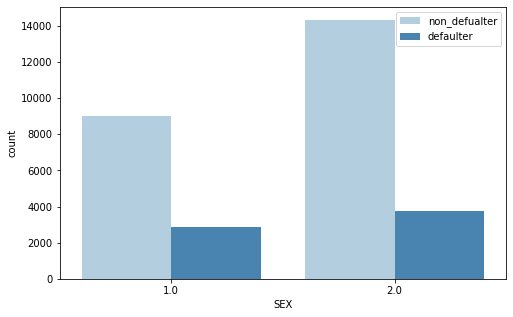

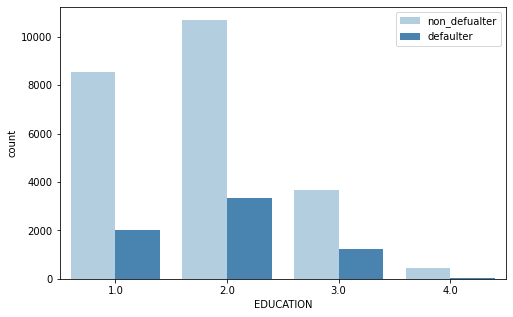

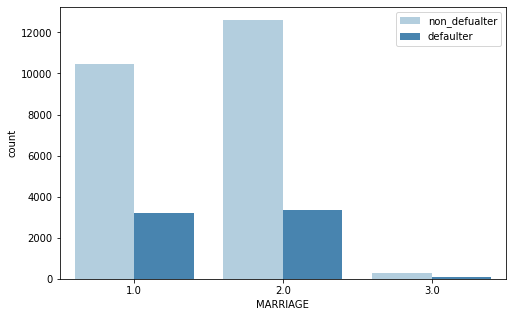

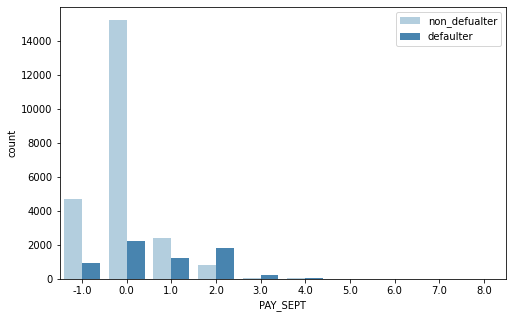

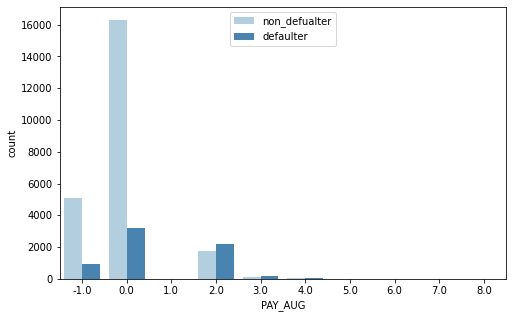

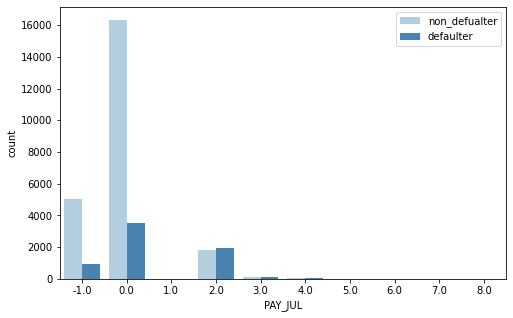

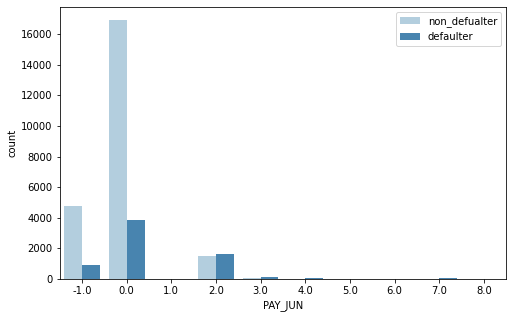

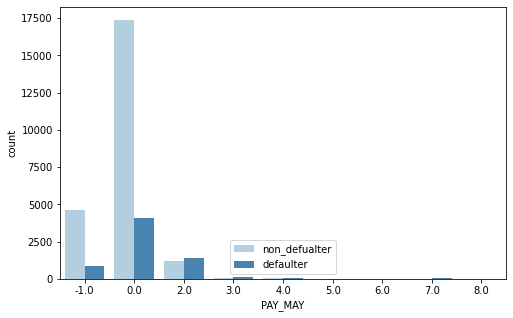

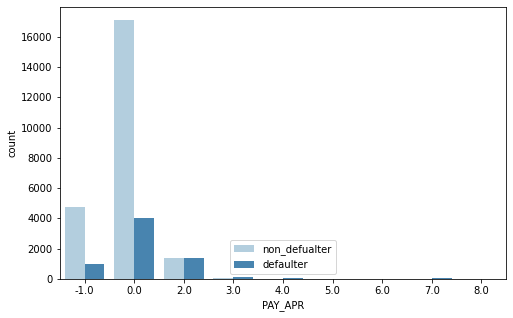

In [21]:
#List of dicrete features
cat_col_list = ['SEX','EDUCATION','MARRIAGE','PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']

# Plot of discrete features
for col in cat_col_list:
  plt.figure(figsize=(8,5))
  sns.countplot(x=col , hue='payment_default' ,palette="Blues", data=df)
  plt.legend(['non_defualter', 'defaulter'])
plt.show()

There are 30,000 credit card clients.

The average value for the amount of credit card limit is 167,484 NT dollars. The standard deviation is 129,747 NT dollars, ranging from 10,000 to 1M NT dollars.

Education level is mostly graduate school and university.

Most of the clients are either marrined or single (less frequent the other status).

Average age is 35.5 years, with a standard deviation of 9.2.

As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month.

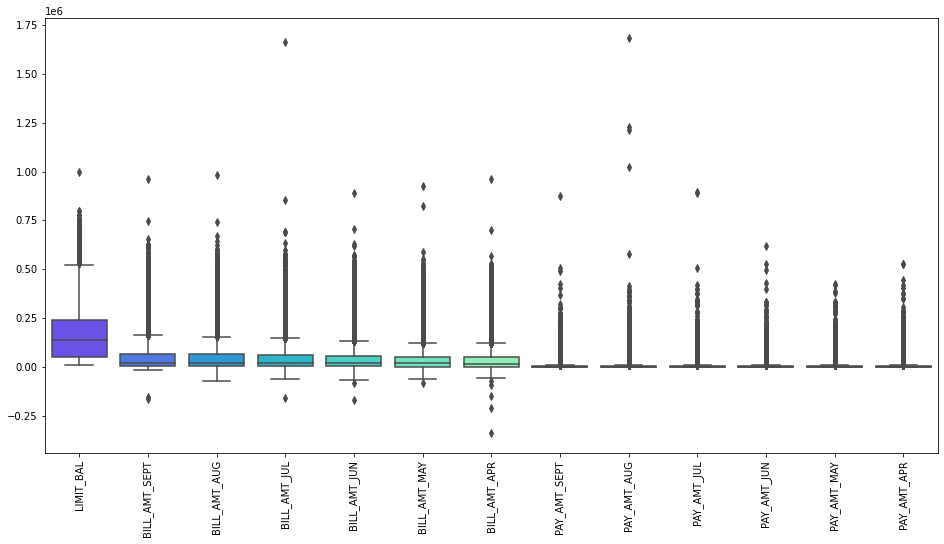

In [22]:
#List of continuous features
c_col_list = ['LIMIT_BAL','BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN',
       'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']
       
# Boxplot of continuous features
plt.figure(figsize=(16,8))
sns.boxplot(data = df[c_col_list],palette = "rainbow")
plt.xticks(rotation=90)
plt.show()

In [23]:
X=df.drop('payment_default',axis=1)
y=df['payment_default']

### Correlation

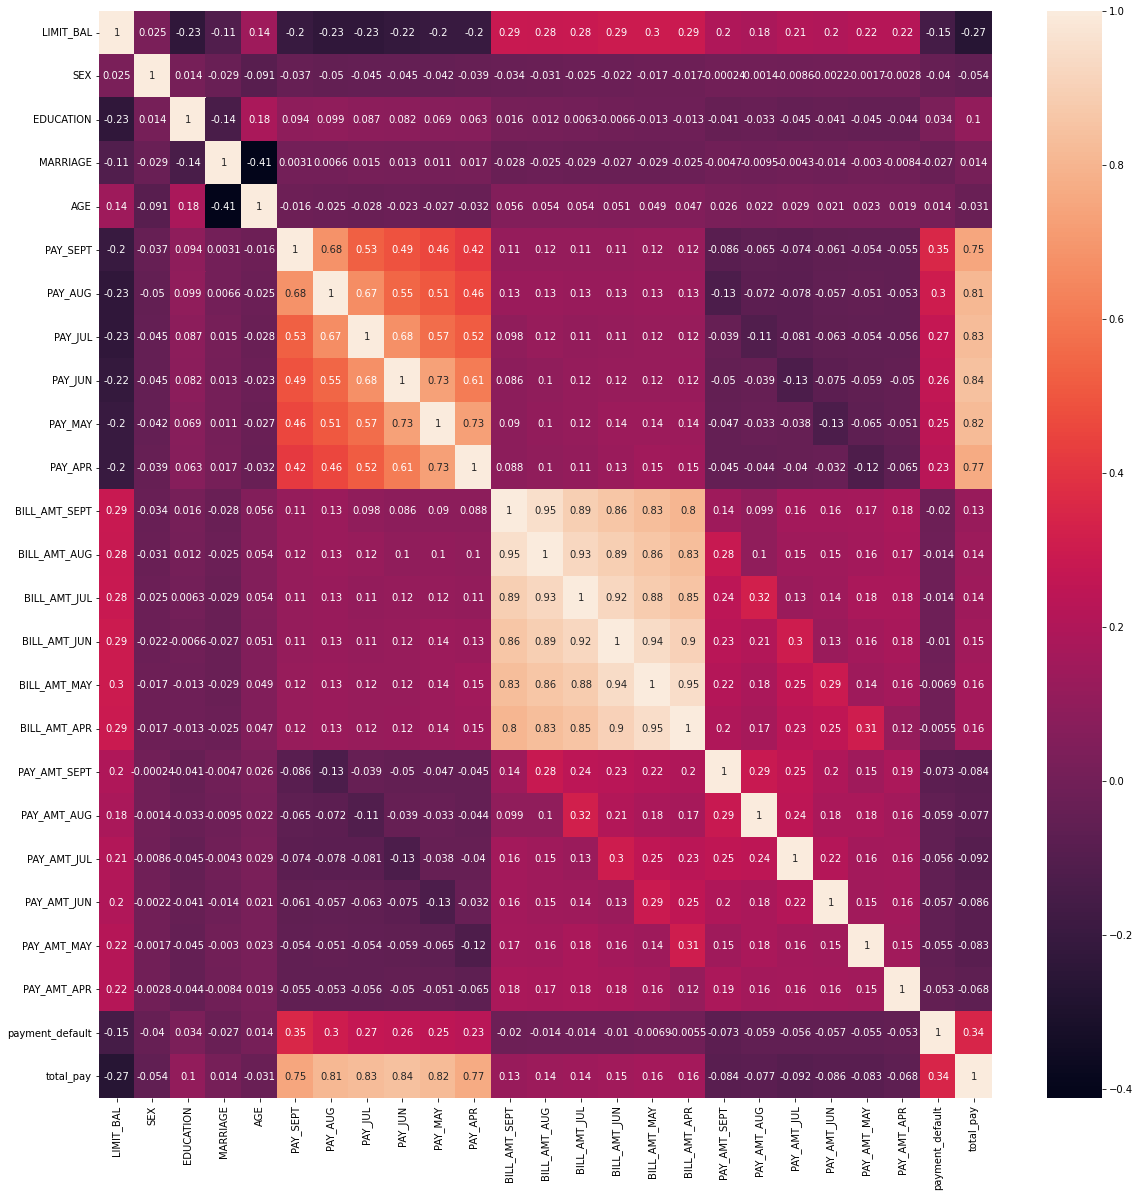

In [24]:
# Pearson correlation heatmap of independent featutes
plt.figure(figsize=(20,20))
ax = sns.heatmap(df.corr(),annot=True)

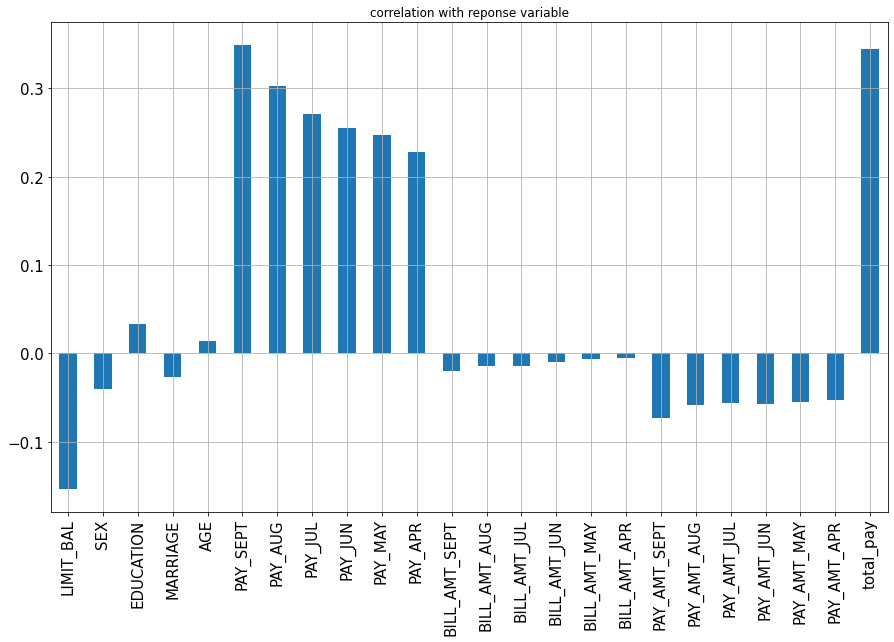

In [25]:
# Graph of correlation of featutes with target variable payment default
X.corrwith(y).plot.bar(figsize=(15,9),title="correlation with reponse variable",fontsize=15,
                        rot=90,grid=True)

### Outlier Treatment

In [26]:
# Removing outlier in default payment 
print (df["payment_default"].value_counts())

# Dropping non defaults where payment is due 
df.drop(df[(df.payment_default == 0) & (df.total_pay > 5)].index,inplace=True)
# Dropping defaults where payment is completed
df.drop(df[(df.payment_default == 1) & (df.total_pay < 1) & (data.PAY_SEPT < 1) & (data.PAY_AUG < 1) 
              & (data.PAY_JUL < 1) & (data.PAY_JUN < 1) & (data.PAY_APR < 1) & (data.PAY_MAY < 1)].index,inplace=True)

new_df = df.copy()
new_df["payment_default"].value_counts()

0.0    23335
1.0     6630
Name: payment_default, dtype: int64


0.0    22146
1.0     4297
Name: payment_default, dtype: int64

In [27]:
# Dropping columns which are of no use
new_df.drop(['total_pay','AGE'], axis=1, inplace=True)

In [28]:
# Creating dummy variable for categorical data
new_df = pd.get_dummies(new_df,columns=['EDUCATION','SEX','MARRIAGE'], drop_first=True)

### Splitting Dataset

In [29]:
X = new_df.drop('payment_default',axis=1)
y = new_df['payment_default']

In [30]:
# Creating test and training dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, stratify=y,random_state=42)
print(X_train.shape)
print(X_test.shape)

(21154, 25)
(5289, 25)


###Managing Class Imbalance

83.74775648117065
16.252245008945465


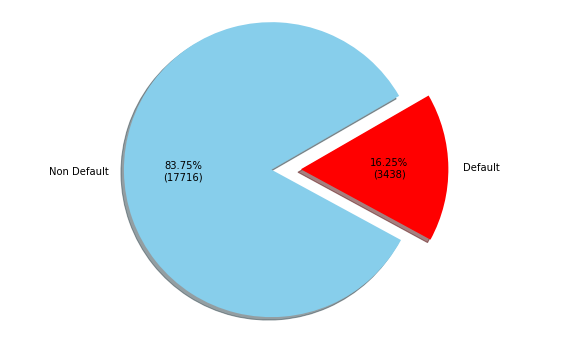

In [31]:
# Plot of majority and minority class
def my_fmt(x):
    print(x)
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)
labels = 'Non Default','Default'
total =len(y_train)
my_colors = ['skyblue','red']
my_explode = (0,0.2)
plt.figure(figsize=(10,6))
plt.pie(y_train.value_counts(), labels=labels ,autopct=my_fmt, startangle=30 , shadow =True, colors = my_colors, explode=my_explode )
plt.axis('equal')
plt.show()

In [32]:
# Oversampling using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 21154
Resampled dataset shape 35432


###Model Pipeline without CV

In [33]:
#Importing Linbraries
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import *

In [34]:
# Making function for model evaluation and confusion matrix
def evaluation(y, y_hat,m):
    cm = confusion_matrix(y, y_hat)
    precision = round(precision_score(y, y_hat),3)
    recall = round(recall_score(y, y_hat),3)
    accuracy = round(accuracy_score(y,y_hat),3)
    auc_roc = round(roc_auc_score(y,y_hat),3)
    f1 = round(f1_score(y,y_hat),3)
    print('Model :' , m)
    print('Recall : ', recall)
    print('Accuracy : ', accuracy)
    print('Precision : ', precision)
    print('AUC_ROC : ', auc_roc)
    print('F1: ', f1)
    sns.heatmap(cm,  cmap= 'PuBu', annot=True, fmt='g', annot_kws=    {'size':12})
    plt.xlabel('predicted', fontsize=10)
    plt.ylabel('actual', fontsize=10)
       
    plt.show();
    print('\n\n')

In [35]:
# Making pipelines for classification models
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('LR', LogisticRegression(random_state=42,n_jobs=-1))])
pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('DT',DecisionTreeClassifier(random_state=42))])
pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('RF',RandomForestClassifier(random_state=42,n_jobs=-1))])
pipe_knn = Pipeline([('scl', StandardScaler()),
                    ('KNN', KNeighborsClassifier())])
pipe_nb = Pipeline([('scl', StandardScaler()),
                     ('NB', GaussianNB())])
pipe_xgb = Pipeline([('scl', StandardScaler()),
                     ('XGB', XGBClassifier(random_state=42,n_jobs=-1))])
pipe_lgbm = Pipeline([('scl', StandardScaler()),
                     ('LGBM', LGBMClassifier(random_state=42,n_jobs=-1))])  

In [36]:
# List of models pipeline
pipelines = [pipe_lr,pipe_dt,pipe_rf,pipe_knn,pipe_nb,pipe_xgb,pipe_lgbm]

In [37]:
# Fitting the model pipelines on training data
for pipe in pipelines:
	pipe.fit(X_smote, y_smote)

Model : Logistic Regression
Recall :  0.766
Accuracy :  0.894
Precision :  0.645
AUC_ROC :  0.842
F1:  0.7


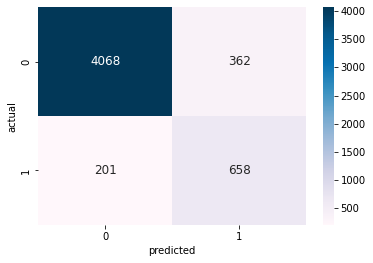




Model : Decision Trees
Recall :  0.703
Accuracy :  0.896
Precision :  0.673
AUC_ROC :  0.819
F1:  0.688


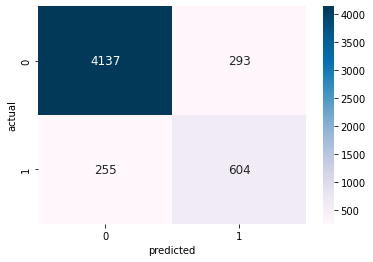




Model : Random Forest
Recall :  0.702
Accuracy :  0.914
Precision :  0.752
AUC_ROC :  0.829
F1:  0.726


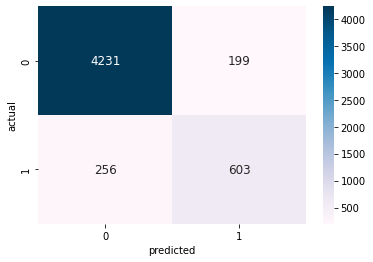




Model : K-Nearest Neighbors
Recall :  0.767
Accuracy :  0.884
Precision :  0.616
AUC_ROC :  0.837
F1:  0.683


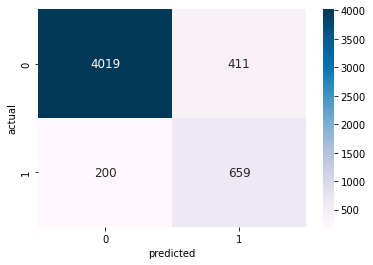




Model : Naive Bayes
Recall :  0.934
Accuracy :  0.469
Precision :  0.226
AUC_ROC :  0.656
F1:  0.363


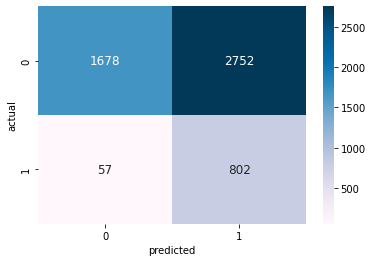




Model : XGB
Recall :  0.769
Accuracy :  0.913
Precision :  0.715
AUC_ROC :  0.855
F1:  0.741


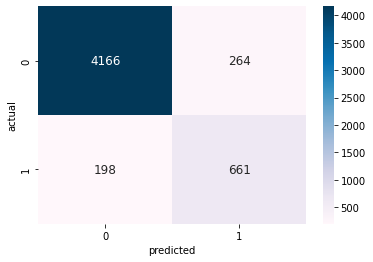




Model : LGBM
Recall :  0.718
Accuracy :  0.917
Precision :  0.757
AUC_ROC :  0.837
F1:  0.737


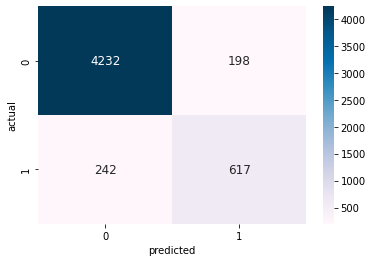

In [38]:
# Evaluating metrics on test data
model_dict = {0: 'Logistic Regression', 1: 'Decision Trees', 
             2: 'Random Forest', 3: 'K-Nearest Neighbors', 
             4: 'Naive Bayes', 5: 'XGB',6: 'LGBM'}
for i, model in enumerate(pipelines):
    y_pred = model.predict(X_test)
    evaluation(y_test,y_pred,model_dict.get(i))

###Model Pipeline with Cross Validation

In [39]:
# Hyperparameter grid for models
param_range = [2,3,4]
param_range_fl = [10,5,1,0.5,0.1,0.01,0.001]
n_estimators = [20,30]

# Logistic Regression
lr_param_grid = [{'LR__penalty': ['l2'],
                   'LR__C': param_range_fl,
                   'LR__solver': ['liblinear']}]

#Decision Tree
dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],
                   'DT__min_samples_leaf': param_range[:1],
                   'DT__max_depth': param_range,
                   'DT__min_samples_split': param_range[:1]}]

#Random Forest
rf_param_grid = [{'RF__min_samples_leaf': param_range[:1],
                  'RF__criterion': ['gini', 'entropy'],
                  'RF__n_estimators': n_estimators,
                   'RF__max_depth': param_range,
                   'RF__min_samples_split': param_range[:1]}]

#KNN
knn_param_grid = [{'KNN__n_neighbors': param_range,
                   'KNN__weights': ['uniform', 'distance'],
                   'KNN__metric': ['minkowski','euclidean', 'manhattan']}]
#Naive Bayes
nb_param_grid = [{'NB__var_smoothing': np.logspace(0,-3, num=100)}]

#XGBoost
xgb_param_grid = [{'XGB__max_depth': param_range,
                   'XGB__tree_method':['hist'],
                   'XGB__learning_rate': param_range_fl,
                    'XGB__min_child_weight': param_range,
                    'XGB__n_estimators': n_estimators}]
#LightGBM
lgbm_param_grid = [{'LGBM__max_depth': param_range,
                    'LGBM__learning_rate': param_range_fl,
                    'LGBM__num_leaves': param_range[:1],
                    'LGBM__n_estimators': n_estimators}]

In [40]:
#Grid Search CrossValidation
lr_grid_search = GridSearchCV(estimator=pipe_lr,
        param_grid=lr_param_grid,
        scoring='f1',
        cv=5)
dt_grid_search = GridSearchCV(estimator=pipe_dt,
        param_grid=dt_param_grid,
        scoring='f1',
        cv=5)
rf_grid_search = GridSearchCV(estimator=pipe_rf,
        param_grid=rf_param_grid,
        scoring='f1',
        cv=5)
knn_grid_search = GridSearchCV(estimator=pipe_knn,
        param_grid=knn_param_grid,
        scoring='f1',
        cv=5)
nb_grid_search = GridSearchCV(estimator=pipe_nb,
        param_grid=nb_param_grid,
        scoring='f1',
        cv=5)
xgb_grid_search = GridSearchCV(estimator=pipe_xgb,
        param_grid=xgb_param_grid,
        scoring='f1',
        cv=5)
lgbm_grid_search = GridSearchCV(estimator=pipe_lgbm,
        param_grid=lgbm_param_grid,
        scoring='f1',
        cv=5)

In [41]:
#Fitting the models on training data
grids = [lr_grid_search, dt_grid_search, rf_grid_search, knn_grid_search, nb_grid_search, xgb_grid_search, lgbm_grid_search]
for pipe in grids:
    pipe.fit(X_smote,y_smote)

Model : Logistic Regression
Recall :  0.766
Accuracy :  0.893
Precision :  0.644
AUC_ROC :  0.842
F1:  0.7


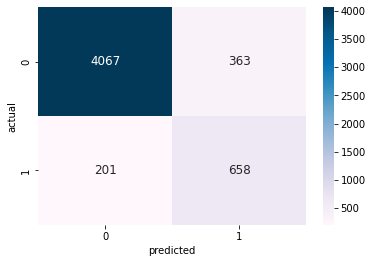




Model : Decision Trees
Recall :  0.838
Accuracy :  0.877
Precision :  0.583
AUC_ROC :  0.861
F1:  0.688


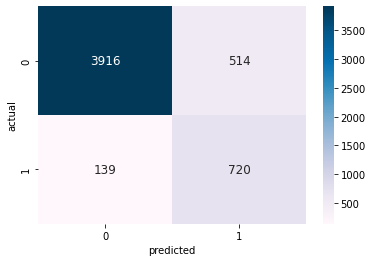




Model : Random Forest
Recall :  0.816
Accuracy :  0.898
Precision :  0.647
AUC_ROC :  0.865
F1:  0.722


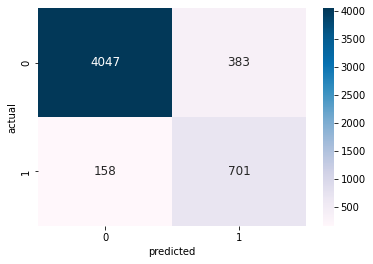




Model : K-Nearest Neighbors
Recall :  0.698
Accuracy :  0.889
Precision :  0.647
AUC_ROC :  0.812
F1:  0.672


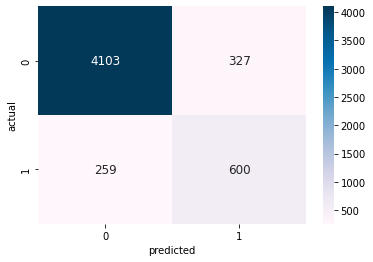




Model : Naive Bayes
Recall :  0.928
Accuracy :  0.56
Precision :  0.26
AUC_ROC :  0.708
F1:  0.407


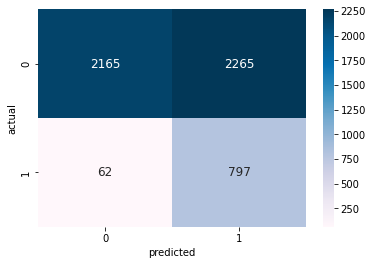




Model : XGB
Recall :  0.792
Accuracy :  0.904
Precision :  0.673
AUC_ROC :  0.858
F1:  0.727


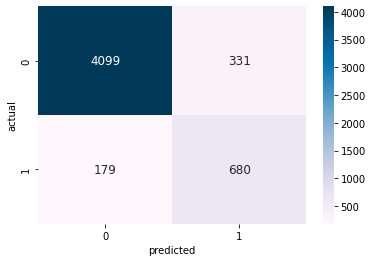




Model : LGBM
Recall :  0.775
Accuracy :  0.91
Precision :  0.703
AUC_ROC :  0.856
F1:  0.737


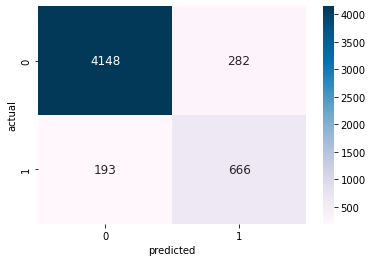

In [42]:
#Evaluating metrics on Test data
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees', 
             2: 'Random Forest', 3: 'K-Nearest Neighbors', 
             4: 'Naive Bayes', 5: 'XGB', 6: 'LGBM'}
for i, model in enumerate(grids):
    y_pred = model.predict(X_test)
    evaluation(y_test,y_pred,grid_dict.get(i))

###RandomForest is the best model for us since it has high recall of 82% with high accuracy 90%.